In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pandas.plotting import scatter_matrix

c:\users\harpreet singh\appdata\local\programs\python\python36-64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290A60F84A8>,
      dtype=object)

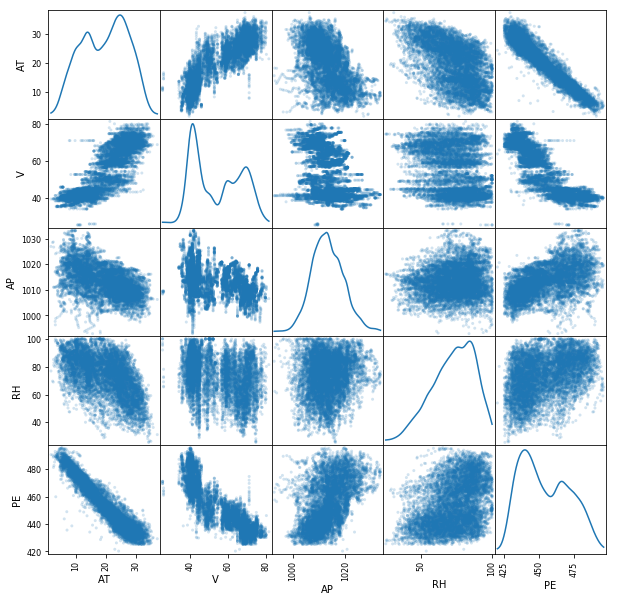

In [124]:
df = pd.read_csv('ccpp.csv')
#df['bias'] =1 #adding bias element

#Inputs and Output
X = scale(np.array(df.drop(['PE'],1)))
#X[:,4]=1 #adding bias element
y = np.array(df['PE'])
y = y.reshape((y.shape[0],1)) #reshaping n, to n,1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20,random_state = 42)
scatter_matrix(df,alpha=0.2,figsize=(10,10),diagonal='kde')

In [125]:
def multilinear_regression():
    
    n = X_train.shape[1]
    n_classes  = y_train.shape[1]

    x = tf.placeholder(tf.float32,[None,n],name='x')
    y = tf.placeholder(tf.float32,[None,n_classes],name='y')
    
    with tf.variable_scope('lreg') as scope:
        
        n_hidden   = x.shape[1]
        n_hidden_1 = x.shape[1]
        n_hidden_2 = x.shape[1]

        n_input    = x.shape[1]
        
        weights={'w1':tf.Variable(tf.ones((n_input,n_hidden))),'w2':tf.Variable(tf.ones((n_hidden,n_hidden_1)))}
        biases={'b1':tf.Variable(tf.zeros((n_hidden))),'b2':tf.Variable(tf.zeros((n_hidden_1)))}

        layer_1 = tf.add(tf.matmul(x, weights['w1']),biases['b1'])
        y_pred = tf.nn.sigmoid(layer_1)
        
        layer_2 = tf.add(tf.matmul(x, weights['w2']),biases['b2'])
        y_pred2 = tf.nn.sigmoid(layer_2)
       
        loss = tf.reduce_mean(tf.square(y_pred - y))
        optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    
    return loss,weights['w1'],biases['b1'],x,y,y_pred,optimizer

In [120]:
def run(epochs):
    
    loss,w,b,x,y,y_pred,optimizer = multilinear_regression()
    cost_hist = np.empty(shape=[1],dtype = float)

    with tf.Session() as session:
        
        init = tf.global_variables_initializer()
        session.run(init)
    
        feed_dict = {x:X_train,y:y_train}
        for i in range(epochs):
            session.run(optimizer,feed_dict)
            
            cost = session.run(loss,feed_dict)
            cost_hist = np.append(cost_hist,cost)
            
            y_pred_test = session.run(y_pred,{x:X_test})
            accuracy = np.sum(np.square(y_pred_test - y_test)) / (2 * len(y_test))

        thetas = session.run(w)
        bias = session.run(b)

    return thetas,cost_hist,bias,accuracy
   

[[ 0.18583392  0.18583392  0.18583392  0.18583392]
 [-0.1525809  -0.1525809  -0.1525809  -0.1525809 ]
 [ 0.04809934  0.04809934  0.04809934  0.04809934]
 [ 0.08636123  0.08636123  0.08636123  0.08636123]]
[10.0337 10.0337 10.0337 10.0337]


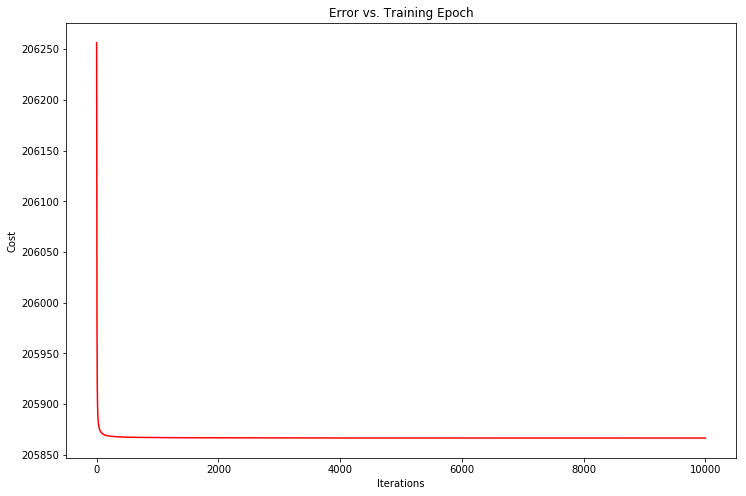

In [121]:
if __name__=='__main__':
    epochs = 10000
    thetas,cost,bias,accuracy=run(epochs) 
    print(thetas)
    print(bias)

    fig, ax = plt.subplots(figsize=(12,8))  
    ax.plot(np.arange(epochs), cost[1:], 'r')  
    ax.set_xlabel('Iterations')  
    ax.set_ylabel('Cost')  
    ax.set_title('Error vs. Training Epoch')

In [94]:
#Scikit learn
#Coefficients: [-14.73251595  -2.98326107   0.34593379  -2.30884968]
#Intercept: 454.4289437515408

In [95]:
def prediction(X, Theta):
    #y_pred = np.dot(X,np.transpose(Theta))
    y_pred = tf.matmul(tf.cast(X, tf.float32), Theta)

    return y_pred

In [96]:
def compute_cost(y_pred,y):
    return np.sum(tf.square(y_pred - y))/(2 * len(y))

In [97]:
from sklearn.metrics import accuracy_score

#y_pred = prediction(X_test, thetas)
accuracy = compute_cost(y_pred,y_test)
print(accuracy)

Tensor("truediv_4:0", shape=(1914, 5), dtype=float32)


In [81]:
#reference: soonhin khor
#https://www.youtube.com/watch?v=F8g_6TXKlxw